<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/%ED%98%BC%EC%9E%90_%ED%95%B4%EB%B3%B4%EB%8A%94_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import matplotlib as mpl
import glob, os # 파일 경로에 관한 라이브러리
import matplotlib.pylab as plt

In [ ]:
# 한글 글자폰트 확인
mpl.rcParams['font.family']='Malgun Gothic'
mpl.rcParams['font.size']= 16
mpl.rcParams['figure.figsize'] = (14,4)

plt.rcParams['axes.unicode_minus']=False

In [ ]:
df_path = r'C:\Users\HKIT\Desktop\재정데이터 시각화모델 경진대회 데이터_열린재정\4. 채무 및 수지'

In [ ]:
df = pd.read_excel('4-1-2. 월별 국가채무(중앙정부).xlsx',sheet_name='Sheet0')

In [ ]:
df.shape

(89, 9)

In [ ]:
df.info

<bound method DataFrame.info of     기준년도   기준월  국가채무총계(조원)  국채 합계(조원)  국고채권(조원)  국민주택채권(조원)  외평채권(조원)  \
0   2021   1.0       835.9      832.1     742.0        80.3       9.7   
1   2021   2.0       853.6      849.8     759.4        80.7       9.7   
2   2021   3.0       862.1      858.5     769.3        79.3       9.8   
3   2021   4.0       880.4      877.0     787.3        80.0       9.7   
4   2021   5.0       899.8      896.6     806.2        80.6       9.8   
..   ...   ...         ...        ...       ...         ...       ...   
84  2014   8.0       511.1      505.9     444.6        53.7       7.6   
85  2014   9.0       496.2      491.0     430.7        53.5       6.8   
86  2014  10.0       502.9      497.5     436.8        53.9       6.8   
87  2014  11.0       509.0      504.4     442.6        54.8       7.1   
88  2014  12.0       503.0      498.1     438.3        52.8       7.0   

    차입금(조원)  국고채무부담행위(조원)  
0       3.1           0.7  
1       3.1           0.7  
2      

In [ ]:
total_financial = df.groupby(['기준년도'])['국가채무총계(조원)'].sum()

In [ ]:
kukmin_jutaek_chaegwon = df.groupby(['기준년도'])['국민주택채권(조원)'].sum()

In [ ]:
haeng_wi = df.groupby(['기준년도'])['국고채무부담행위(조원)'].sum()

In [ ]:
chaipgeum = df.groupby(['기준년도'])['차입금(조원)'].sum()

In [ ]:
ratio_1 = pd.DataFrame(kukmin_jutaek_chaegwon/total_financial)

In [ ]:
ratio_2 = pd.DataFrame(haeng_wi/total_financial)

In [ ]:
ratio_3 = pd.DataFrame(haeng_wi/kukmin_jutaek_chaegwon)

In [ ]:
total_financial

기준년도
2014    5920.8
2015    6471.2
2016    7079.7
2017    7500.0
2018    7942.6
2019    8235.3
2020    9276.9
2021    4331.8
Name: 국가채무총계(조원), dtype: float64

Text(0.5, 1.0, '기준년도 별 국가재무총계(조원)')

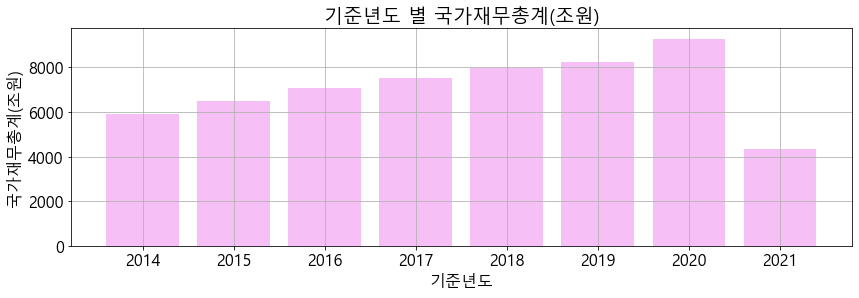

In [ ]:
plt.bar(x=[2014,2015,2016,2017,2018,2019,2020,2021],height=total_financial, color='violet', alpha=0.5)
plt.grid(True)
plt.xlabel('기준년도')
plt.ylabel('국가재무총계(조원)')
plt.title('기준년도 별 국가재무총계(조원)')
# [2014,2015,2016,2017,2018,2019,2020,2021]
# 2021년은 5개월 밖에 조사 되지 않았기 때문에 시각화 자료에서는 가장 작은 값이 나오게 되었습니다.
# 국가재무총계는 년도가 갈수록 점차 많아짐을 알 수 있습니다.

In [ ]:
kukmin_jutaek_chaegwon

기준년도
2014    634.9
2015    683.0
2016    753.1
2017    797.4
2018    854.4
2019    903.3
2020    930.8
2021    400.9
Name: 국민주택채권(조원), dtype: float64

Text(0.5, 1.0, '기준년도 별 국민주택채권(조원)')

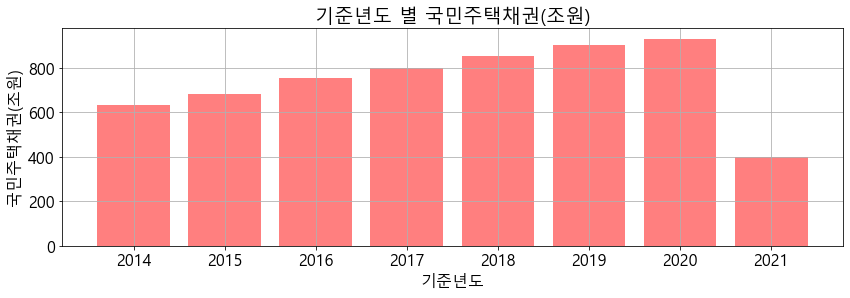

In [ ]:
plt.bar(x=[2014,2015,2016,2017,2018,2019,2020,2021],height=kukmin_jutaek_chaegwon, color='r',alpha=0.5,
       )
plt.grid(True)
plt.xlabel('기준년도')
plt.ylabel('국민주택채권(조원)')
plt.title('기준년도 별 국민주택채권(조원)')
# 국민주택채권은 년도가 갈수록 점차 증가하고 있음을 알 수 있습니다.

In [ ]:
haeng_wi

기준년도
2014    32.6
2015    27.3
2016    17.6
2017     4.7
2018     2.4
2019     2.3
2020     1.8
2021     3.5
Name: 국고채무부담행위(조원), dtype: float64

Text(0.5, 1.0, '기준년도 별 국고채무부담행위(조원)')

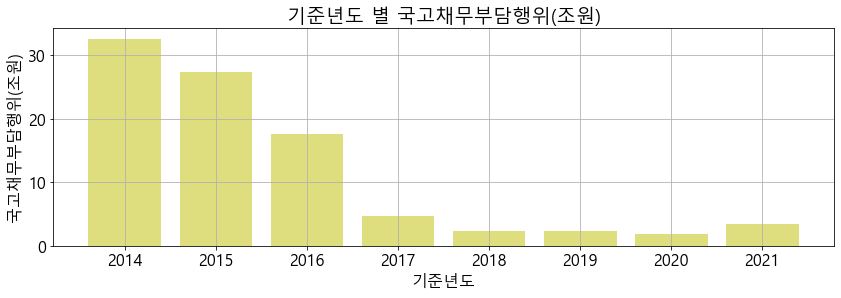

In [ ]:
plt.bar(x=[2014,2015,2016,2017,2018,2019,2020,2021],height=haeng_wi, color='y', alpha=0.5)
plt.grid(True)
plt.xlabel('기준년도')
plt.ylabel('국고채무부담행위(조원)')
plt.title('기준년도 별 국고채무부담행위(조원)')
# 국고채무부담행위는 년도가 갈수록 감소하는 경향이 있습니다. 2021년 소폭 오른것을 확인 할 수 있습니다.

Text(0.5, 1.0, '기준년도 별 차입금(조원)')

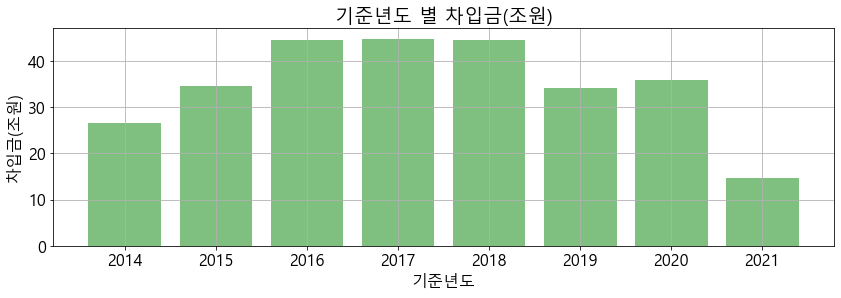

In [ ]:
plt.bar(x=[2014,2015,2016,2017,2018,2019,2020,2021],height=chaipgeum, color='g', alpha=0.5)
plt.grid(True)
plt.xlabel('기준년도')
plt.ylabel('차입금(조원)')
plt.title('기준년도 별 차입금(조원)')
# 2016, 2017, 2018년 차입금이 가장 높았던 것을 알 수 있습니다.

In [ ]:
df.groupby(['국가채무총계(조원)','국채 합계(조원)','국고채권(조원)','국민주택채권(조원)','외평채권(조원)','차입금(조원)',
'국고채무부담행위(조원)'])['기준년도'].aggregate('mean')

국가채무총계(조원)  국채 합계(조원)  국고채권(조원)  국민주택채권(조원)  외평채권(조원)  차입금(조원)  국고채무부담행위(조원)
472.4       467.8      408.2     52.0        7.7       1.9      2.7             2014.0
474.9       470.2      410.5     52.1        7.6       2.0      2.7             2014.0
480.9       476.4      416.9     51.9        7.6       1.9      2.7             2014.0
481.7       476.8      418.8     52.2        5.8       2.1      2.7             2014.0
490.7       485.8      427.6     52.5        5.7       2.2      2.8             2014.0
                                                                                 ...  
835.9       832.1      742.0     80.3        9.7       3.1      0.7             2021.0
853.6       849.8      759.4     80.7        9.7       3.1      0.7             2021.0
862.1       858.5      769.3     79.3        9.8       3.0      0.7             2021.0
880.4       877.0      787.3     80.0        9.7       2.8      0.7             2021.0
899.8       896.6      806.2     80.6        9.8     

In [ ]:
df.pivot_table('기준년도',['국가채무총계(조원)','국채 합계(조원)','국고채권(조원)','국민주택채권(조원)','외평채권(조원)','차입금(조원)',
'국고채무부담행위(조원)'])

,,,,,,,기준년도
국가채무총계(조원),국채 합계(조원),국고채권(조원),국민주택채권(조원),외평채권(조원),차입금(조원),국고채무부담행위(조원),
472.4,467.8,408.2,52.0,7.7,1.9,2.7,2014
474.9,470.2,410.5,52.1,7.6,2.0,2.7,2014
480.9,476.4,416.9,51.9,7.6,1.9,2.7,2014
481.7,476.8,418.8,52.2,5.8,2.1,2.7,2014
490.7,485.8,427.6,52.5,5.7,2.2,2.8,2014
...,...,...,...,...,...,...,...
835.9,832.1,742.0,80.3,9.7,3.1,0.7,2021
853.6,849.8,759.4,80.7,9.7,3.1,0.7,2021
862.1,858.5,769.3,79.3,9.8,3.0,0.7,2021


In [ ]:
df.corr()

,기준년도,기준월,국가채무총계(조원),국채 합계(조원),국고채권(조원),국민주택채권(조원),외평채권(조원),차입금(조원),국고채무부담행위(조원)
기준년도,1.000000,-0.099621,0.965993,0.967029,0.960799,0.983569,0.786910,0.206048,-0.858797
기준월,-0.099621,1.000000,0.009593,0.009108,0.006191,0.039325,-0.000260,0.118055,-0.027795
국가채무총계(조원),0.965993,0.009593,1.000000,0.999986,0.999685,0.950640,0.832326,0.214263,-0.773783
국채 합계(조원),0.967029,0.009108,0.999986,1.000000,0.999593,0.951727,0.832718,0.212363,-0.775701
국고채권(조원),0.960799,0.006191,0.999685,0.999593,1.000000,0.942749,0.832967,0.208039,-0.761641
국민주택채권(조원),0.983569,0.039325,0.950640,0.951727,0.942749,1.000000,0.753874,0.276708,-0.895651
외평채권(조원),0.786910,-0.000260,0.832326,0.832718,0.832967,0.753874,1.000000,-0.112376,-0.520899
차입금(조원),0.206048,0.118055,0.214263,0.212363,0.208039,0.276708,-0.112376,1.000000,-0.507695
국고채무부담행위(조원),-0.858797,-0.027795,-0.773783,-0.775701,-0.761641,-0.895651,-0.520899,-0.507695,1.000000


In [ ]:
df_cor=df.corr()

<AxesSubplot:>

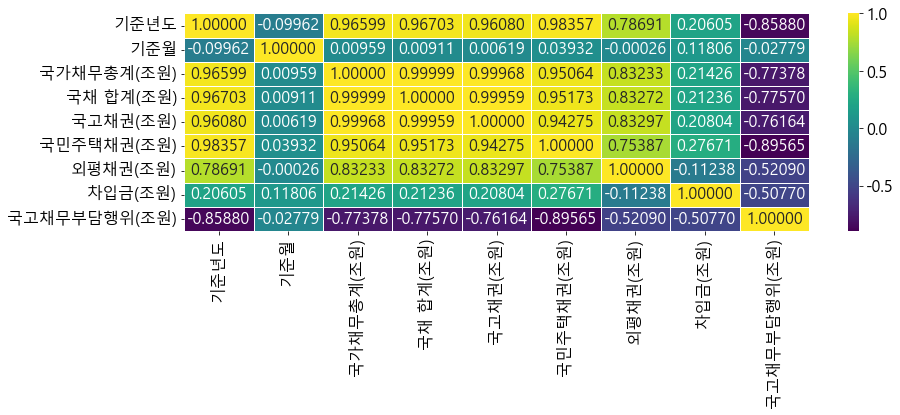

In [ ]:
sns.heatmap(data=df_cor, annot=True, fmt='.5f',linewidths=0.5,cmap='viridis')
# 상관관계를 조사하였습니다. 

In [ ]:
ratio_1

,0
기준년도,
2014,0.107232
2015,0.105545
2016,0.106375
2017,0.106320
2018,0.107572
2019,0.109686
2020,0.100335
2021,0.092548


In [ ]:
ratio_2

,0
기준년도,
2014,0.005506
2015,0.004219
2016,0.002486
2017,0.000627
2018,0.000302
2019,0.000279
2020,0.000194
2021,0.000808


In [ ]:
ratio_3

,0
기준년도,
2014,0.051347
2015,0.039971
2016,0.023370
2017,0.005894
2018,0.002809
2019,0.002546
2020,0.001934
2021,0.008730


In [ ]:
0.107232
0.105545
0.106375
0.106320
0.107572
0.109686
0.100335
0.092548

C:\Users\HKIT\AppData\Local\Temp/ipykernel_8012/1909307093.py:6: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(ratio_1, labels=labels,autopct='%.1f%%')


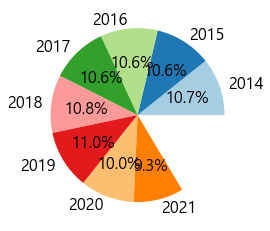

In [ ]:
palette = sns.color_palette("bright")
sns.set_palette('Paired')
ratio_1 = ['0.107232','0.105545','0.106375','0.106320','0.107572','0.109686','0.100335','0.092548']
labels=['2014','2015','2016','2017','2018','2019','2020','2021']

plt.pie(ratio_1, labels=labels,autopct='%.1f%%')
plt.show()

In [ ]:
## 두 번째 혼자 해보는 데이터 시각화

In [ ]:
df_path = r'C:\Users\HKIT\Desktop\분야별 재정지출'

In [ ]:
fields = os.listdir(df_path)
fields = ['공공질서 및 안전 분야',
 '과학기술 분야',
 '교육 분야',
 '교통 및 물류 분야',
 '국방 분야',
 '국토 및 지역개발 분야',
 '농림수산 분야',
 '문화 및 관광 분야',
 '보건 분야',
 '사회복지 분야',
 '산업·중소기업 및 에너지 분야',
 '일반·지방행정 분야',
 '통신 분야',
 '통일·외교 분야',
 '환경 분야']

In [ ]:
dfs = []
for field in fields:
    print(field, end=' :')

    f = f'{df_path}/{field}/{field} 국고보조금 추이.CSV'
    print(f)
    print(os.path.isfile(f))
    if os.path.isfile(f):
        dfs.append(pd.read_csv(f, encoding='CP949'))
        print('Y')
    else:
        print('N')

공공질서 및 안전 분야 :C:\Users\HKIT\Desktop\분야별 재정지출/공공질서 및 안전 분야/공공질서 및 안전 분야 국고보조금 추이.CSV
True
Y
과학기술 분야 :C:\Users\HKIT\Desktop\분야별 재정지출/과학기술 분야/과학기술 분야 국고보조금 추이.CSV
True
Y
교육 분야 :C:\Users\HKIT\Desktop\분야별 재정지출/교육 분야/교육 분야 국고보조금 추이.CSV
True
Y
교통 및 물류 분야 :C:\Users\HKIT\Desktop\분야별 재정지출/교통 및 물류 분야/교통 및 물류 분야 국고보조금 추이.CSV
True
Y
국방 분야 :C:\Users\HKIT\Desktop\분야별 재정지출/국방 분야/국방 분야 국고보조금 추이.CSV
True
Y
국토 및 지역개발 분야 :C:\Users\HKIT\Desktop\분야별 재정지출/국토 및 지역개발 분야/국토 및 지역개발 분야 국고보조금 추이.CSV
True
Y
농림수산 분야 :C:\Users\HKIT\Desktop\분야별 재정지출/농림수산 분야/농림수산 분야 국고보조금 추이.CSV
True
Y
문화 및 관광 분야 :C:\Users\HKIT\Desktop\분야별 재정지출/문화 및 관광 분야/문화 및 관광 분야 국고보조금 추이.CSV
True
Y
보건 분야 :C:\Users\HKIT\Desktop\분야별 재정지출/보건 분야/보건 분야 국고보조금 추이.CSV
True
Y
사회복지 분야 :C:\Users\HKIT\Desktop\분야별 재정지출/사회복지 분야/사회복지 분야 국고보조금 추이.CSV
True
Y
산업·중소기업 및 에너지 분야 :C:\Users\HKIT\Desktop\분야별 재정지출/산업·중소기업 및 에너지 분야/산업·중소기업 및 에너지 분야 국고보조금 추이.CSV
True
Y
일반·지방행정 분야 :C:\Users\HKIT\Desktop\분야별 재정지출/일반·지방행정 분야/일반·지방행정 분야 국고보조금 추이.CSV
True
Y
통신 분야 :C:\Users\HKIT\D

In [ ]:
for field, df in zip(fields, dfs):
    print(field)
    print(df)

공공질서 및 안전 분야
     연도   기준  민간_경상보조(억원)  민간_자본보조(억원)  지자체_경상보조(억원)  지자체_자본보조(억원)
0  2015   결산         1136           52           995         10178
1  2016   결산         1275            0           971          8947
2  2017   결산         1540            3           947          8569
3  2018   결산         1574            4          1006          8505
4  2019   결산         2178           39          1368         13508
5  2020  본예산         2397            8          1124          5504
6  2021  본예산         2558            2          1154         14514
과학기술 분야
     연도   기준  민간_경상보조(억원)  민간_자본보조(억원)  지자체_경상보조(억원)  지자체_자본보조(억원)
0  2015   결산          483          149            54           275
1  2016   결산          447           65            53           431
2  2017   결산          521          103            52           247
3  2018   결산          528            0            53           376
4  2019   결산          280            0            71            92
5  2020  본예산          285           37   

In [ ]:
df = pd.concat(dfs, axis=0, ignore_index=True)
df.head(15)

,연도,기준,민간_경상보조(억원),민간_자본보조(억원),지자체_경상보조(억원),지자체_자본보조(억원)
0,2015,결산,1136,52.0,995.0,10178.0
1,2016,결산,1275,0.0,971.0,8947.0
2,2017,결산,1540,3.0,947.0,8569.0
3,2018,결산,1574,4.0,1006.0,8505.0
4,2019,결산,2178,39.0,1368.0,13508.0
5,2020,본예산,2397,8.0,1124.0,5504.0
6,2021,본예산,2558,2.0,1154.0,14514.0
7,2015,결산,483,149.0,54.0,275.0
8,2016,결산,447,65.0,53.0,431.0
9,2017,결산,521,103.0,52.0,247.0


In [ ]:
fields

['공공질서 및 안전 분야',
 '과학기술 분야',
 '교육 분야',
 '교통 및 물류 분야',
 '국방 분야',
 '국토 및 지역개발 분야',
 '농림수산 분야',
 '문화 및 관광 분야',
 '보건 분야',
 '사회복지 분야',
 '산업·중소기업 및 에너지 분야',
 '일반·지방행정 분야',
 '통신 분야',
 '통일·외교 분야',
 '환경 분야']

In [ ]:
df['분야'] = [field for field in fields for i in range(7)]
df.head(10)

,연도,기준,민간_경상보조(억원),민간_자본보조(억원),지자체_경상보조(억원),지자체_자본보조(억원),분야
0,공공질서 및 안전 분야,결산,1136,52.0,995.0,10178.0,공공질서 및 안전 분야
1,공공질서 및 안전 분야,결산,1275,0.0,971.0,8947.0,공공질서 및 안전 분야
2,공공질서 및 안전 분야,결산,1540,3.0,947.0,8569.0,공공질서 및 안전 분야
3,공공질서 및 안전 분야,결산,1574,4.0,1006.0,8505.0,공공질서 및 안전 분야
4,공공질서 및 안전 분야,결산,2178,39.0,1368.0,13508.0,공공질서 및 안전 분야
5,공공질서 및 안전 분야,본예산,2397,8.0,1124.0,5504.0,공공질서 및 안전 분야
6,공공질서 및 안전 분야,본예산,2558,2.0,1154.0,14514.0,공공질서 및 안전 분야
7,과학기술 분야,결산,483,149.0,54.0,275.0,과학기술 분야
8,과학기술 분야,결산,447,65.0,53.0,431.0,과학기술 분야
9,과학기술 분야,결산,521,103.0,52.0,247.0,과학기술 분야


                  민간_경상보조(억원)  민간_자본보조(억원)  지자체_경상보조(억원)  지자체_자본보조(억원)
분야                                                                    
과학기술 분야                  2823        394.0         416.0        1746.0
교육 분야                   17461        201.0        7438.0        4814.0
교통 및 물류 분야              79045      21634.0       12487.0      113100.0
국방 분야                    6898         88.0           0.0         263.0
국토 및 지역개발 분야             6148       1377.0        3660.0      108377.0
농림수산 분야                126024      84678.0      190310.0      245347.0
문화 및 관광 분야             165626       9325.0       28995.0      117032.0
보건 분야                   25504       4794.0       68064.0       13469.0
사회복지 분야                346489       3693.0     2388368.0       74598.0
산업·중소기업 및 에너지 분야       204414       6707.0       25300.0       30802.0
일반·지방행정 분야              10427        142.0       26920.0       31975.0
통신 분야                   13577        430.0           0.0           0.0
통일·외교 

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(-2.0, 0, '통일·외교 분야'),
  Text(0.0, 0, '과학기술 분야'),
  Text(2.0, 0, '교통 및 물류 분야'),
  Text(4.0, 0, '국토 및 지역개발 분야'),
  Text(6.0, 0, '문화 및 관광 분야'),
  Text(8.0, 0, '사회복지 분야'),
  Text(10.0, 0, '일반·지방행정 분야'),
  Text(12.0, 0, '통일·외교 분야'),
  Text(14.0, 0, '')])

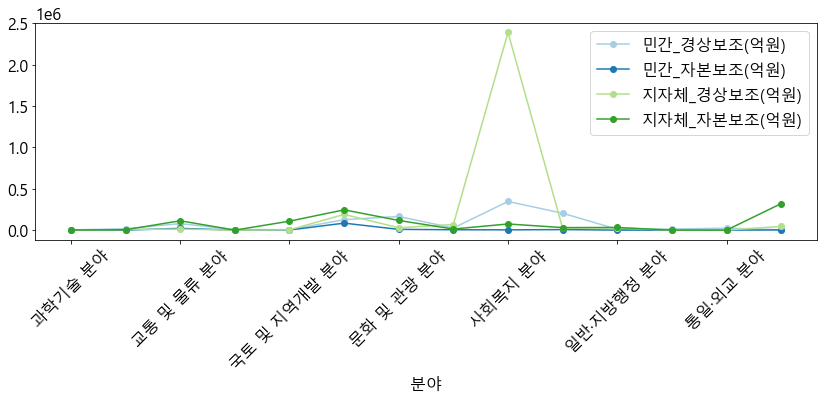

In [ ]:
gru = df.groupby('분야').sum().iloc[1:]
print(gru)
gru.plot(marker='o')
plt.xticks(rotation=45)

In [ ]:
df.columns.unique()

Index(['연도', '기준', '민간_경상보조(억원)', '민간_자본보조(억원)', '지자체_경상보조(억원)',
       '지자체_자본보조(억원)', '분야'],
      dtype='object')

In [ ]:
df

,연도,기준,민간_경상보조(억원),민간_자본보조(억원),지자체_경상보조(억원),지자체_자본보조(억원),분야
0,공공질서 및 안전 분야,결산,1136,52.0,995.0,10178.0,공공질서 및 안전 분야
1,공공질서 및 안전 분야,결산,1275,0.0,971.0,8947.0,공공질서 및 안전 분야
2,공공질서 및 안전 분야,결산,1540,3.0,947.0,8569.0,공공질서 및 안전 분야
3,공공질서 및 안전 분야,결산,1574,4.0,1006.0,8505.0,공공질서 및 안전 분야
4,공공질서 및 안전 분야,결산,2178,39.0,1368.0,13508.0,공공질서 및 안전 분야
...,...,...,...,...,...,...,...
100,환경 분야,결산,729,93.0,5359.0,41081.0,환경 분야
101,환경 분야,결산,579,161.0,5051.0,40278.0,환경 분야
102,환경 분야,결산,1157,611.0,6164.0,49276.0,환경 분야
103,환경 분야,본예산,538,402.0,6676.0,53193.0,환경 분야


In [ ]:
df_1=df.groupby('분야').sum()
df_2=df.groupby('분야').mean()

In [ ]:
df_3 = df.corr()

<AxesSubplot:>

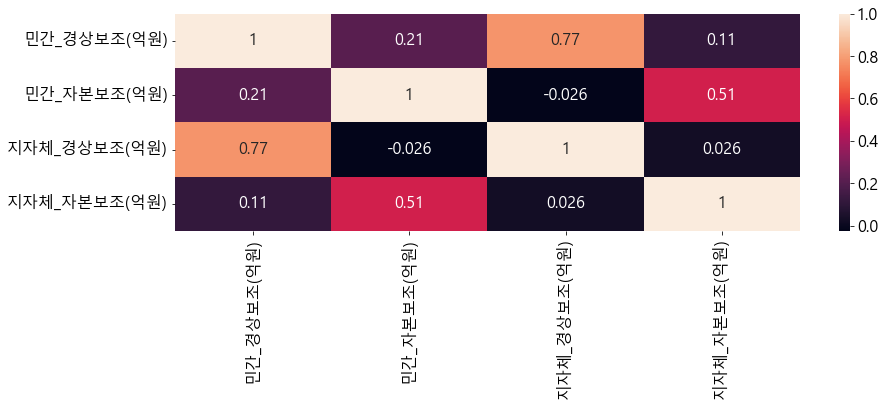

In [ ]:
sns.heatmap(df_3,annot=True)